### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Check the rows & column of the dataset
df.shape

(5572, 5)

In [4]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Check the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# Drop the unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
# Again check the first 5 rows
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename the v1 & v2 as target & text column
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Initialize the label encoder
encoder = LabelEncoder()

In [10]:
# Fit-transform the target column using label encoder
df['Target'] = encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int32

In [11]:
# Check the duplicate values 
df.duplicated().sum()

403

In [12]:
# Drop the duplicate values 
df = df.drop_duplicates(keep='first')

In [13]:
# After dropping Again check the sum of duplicate
df.duplicated().sum()

0

## EDA

In [14]:
# Check the value count of target column
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

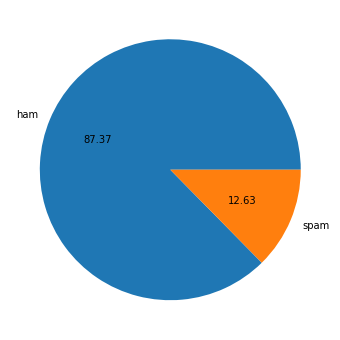

In [15]:
# pie-chart
plt.figure(figsize=(15,6))
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f");

In [16]:
# download punkt package from nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Check the length of text using len function and create a new column as num_characters
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Check the number of words in text column and create a new column as num_words 
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
# Check the number of sentence in text column and create a new column as num_sentence
df['num_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
# Statistical measures
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
# Check the statistical measure if target is not spam
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
# Check the statistical measure if target is spam
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


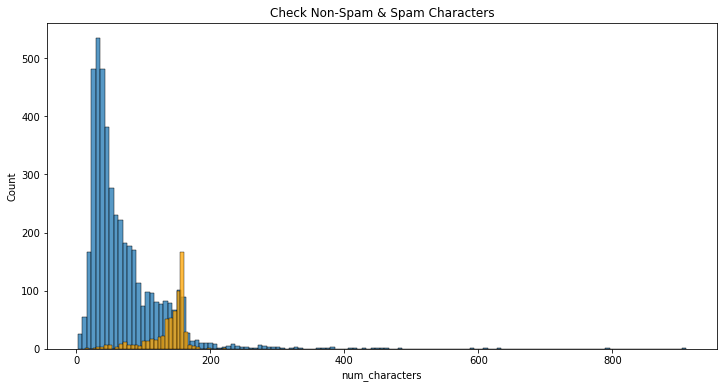

In [23]:
plt.figure(figsize=(12,6))
plt.title('Check Non-Spam & Spam Characters')
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color='orange');

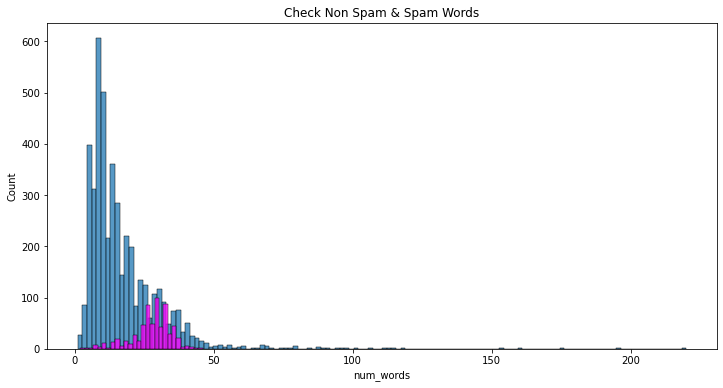

In [24]:
plt.figure(figsize=(12,6))
plt.title('Check Non Spam & Spam Words')
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='magenta');

In [25]:
# Check the correlation 
df.corr(method='pearson')

,Target,num_characters,num_words,num_sentence
Target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentence,0.284901,0.638143,0.684541,1.000000


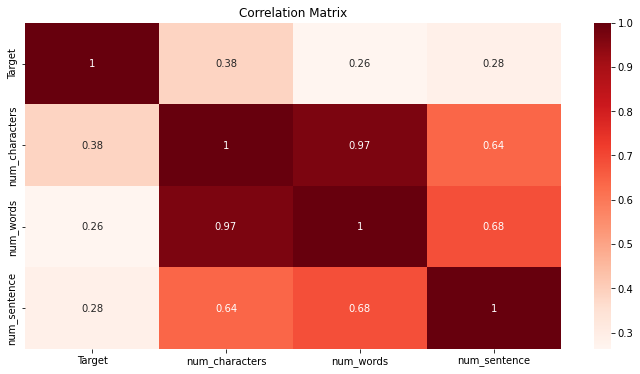

In [26]:
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), 
            annot=True, 
            cbar=True, 
            cmap='Reds');

#### Insight

##### 1. Around 87% text are non-spam and 13% text are spam.
##### 2. Non-spam characters are more than spam characters.
##### 3. Non-spam words are more than spam words.

In [27]:
# Check the stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
# Check the punctuation
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
# initialize the porter stemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
# Create a function for text preprocessing
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)    

In [31]:
# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Apply the transform text function on text
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
# Create a new column as transform text
df['transform_text'] = df['Text'].apply(transform_text)
df.head()

,Target,Text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
# set the word cloud parameters
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

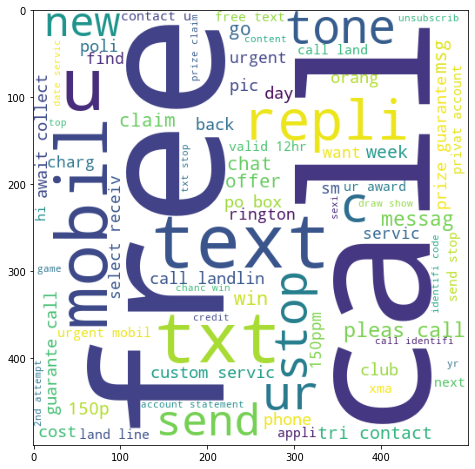

In [35]:
# Generate a spam wordcloud 
spam_wc = wc.generate(df[df['Target'] == 1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(spam_wc);

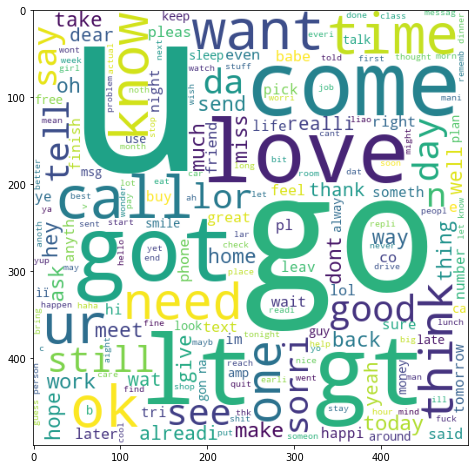

In [36]:
# Generate a Non spam/ham wordcloud
ham_wc = wc.generate(df[df['Target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham_wc);

In [37]:
# Append all the spam text in spam_corpus 
spam_corpus = []
for msg in df[df['Target'] == 1]['transform_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
# Check the length of spam corpus
len(spam_corpus)

9939

In [39]:
from collections import Counter

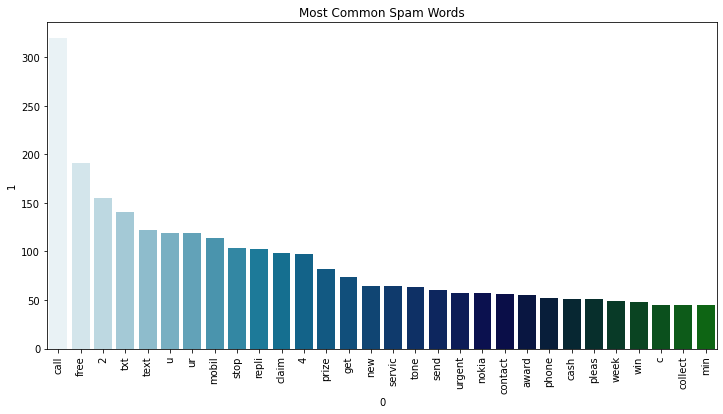

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            pd.DataFrame(Counter(spam_corpus).most_common(30))[1], 
            palette='ocean_r')
plt.xticks(rotation='vertical')
plt.title('Most Common Spam Words')
plt.show();

In [41]:
# Append all the non-spam/ham text in ham_corpus 
ham_corpus = []
for msg in df[df['Target'] == 0]['transform_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
# Check the length of non-spam/ham corpus
len(ham_corpus)

35394

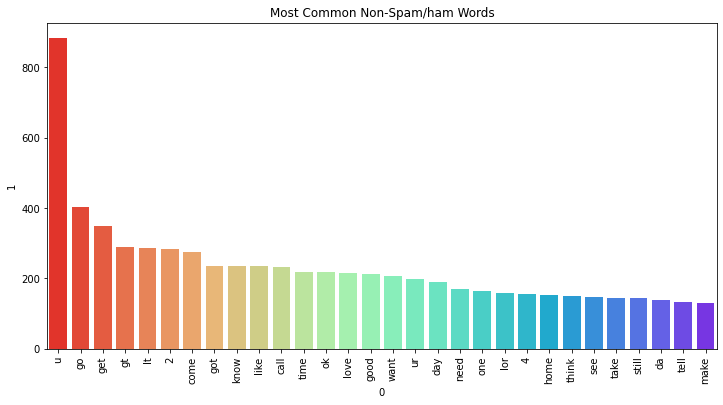

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            pd.DataFrame(Counter(ham_corpus).most_common(30))[1], 
            palette='rainbow_r')
plt.xticks(rotation='vertical')
plt.title('Most Common Non-Spam/ham Words')
plt.show();

In [44]:
# Initialize the count vectorizer and tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [45]:
# Transform the text into array
X = tfidf.fit_transform(df['transform_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
# Check the shape of X variable
X.shape

(5169, 3000)

In [47]:
# Check the values of target column
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

### train_test_split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Initialize the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Model Building Using Various Classification Techniques

In [50]:
# Importing the necessary libraries
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
# Initialize the classifier
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
# Model fitting on gaussian-naive-bayes
gnb.fit(x_train, y_train)
prediction = gnb.predict(x_test)
print(accuracy_score(y_test, prediction))
print(precision_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [53]:
# Model fitting on Multinomial-naive-bayes
mnb.fit(x_train, y_train)
prediction = mnb.predict(x_test)
print(accuracy_score(y_test, prediction))
print(precision_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [54]:
# Model fitting on Bernouli-naive-bayes
bnb.fit(x_train, y_train)
prediction = bnb.predict(x_test)
print(accuracy_score(y_test, prediction))
print(precision_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [55]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
# Initialize the classifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [57]:
# Creating the classifier's key-value pair
clfs = {
    'SVC' : svc,
    'kN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}

In [58]:
# Function to train the classifier
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    
    return accuracy, precision

In [59]:
# Train the svc claasifier
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [60]:
# Append the accuracy & precison score
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy :  0.9758220502901354
Precision :  0.9747899159663865
For  kN
Accuracy :  0.9052224371373307
Precision :  1.0
For  NB
Accuracy :  0.9709864603481625
Precision :  1.0
For  DT
Accuracy :  0.9303675048355899
Precision :  0.8367346938775511
For  LR
Accuracy :  0.9584139264990329
Precision :  0.9702970297029703
For  RF
Accuracy :  0.9748549323017408
Precision :  0.9827586206896551
For  AdaBoost
Accuracy :  0.960348162475822
Precision :  0.9292035398230089
For  BgC
Accuracy :  0.9574468085106383
Precision :  0.8671875
For  ETC
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406
For  GBDT
Accuracy :  0.9477756286266924
Precision :  0.92


In [61]:
# Sort the value on the basis of precision and store it on performance_df column
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 
                               'Accuracy':accuracy_scores, 
                               'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [62]:
# Check the performance_df column
performance_df

,Algorithm,Accuracy,Precision
1,kN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188
3,DT,0.930368,0.836735


In [63]:
# Unpivot the dataframe using melt function and store it on performance_df1
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,kN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.930368


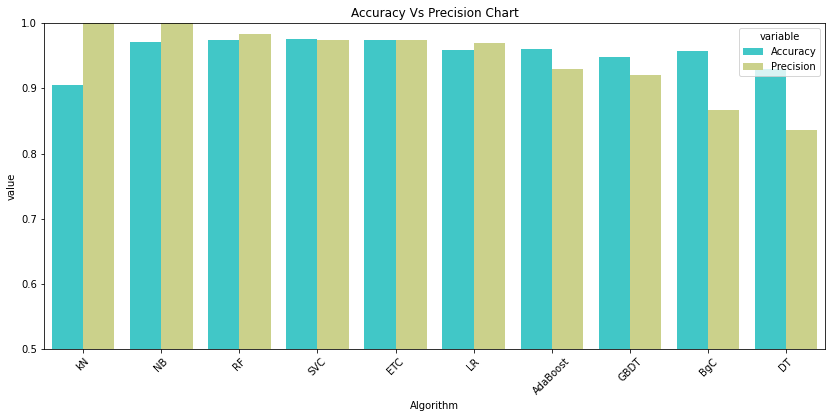

In [64]:
plt.figure(figsize=(14,6))
sns.barplot(data=performance_df1, 
            x='Algorithm', 
            y='value', 
            hue='variable', 
            palette='rainbow')
plt.ylim(0.5,1.0)
plt.title('Accuracy Vs Precision Chart')
plt.xticks(rotation=45)
plt.show();

In [65]:
# Create the new dataframe on the basis of algorithm, accuracy-score & precision-score 
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 
                        'Accuracy_max_ft_3000':accuracy_scores, 
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [66]:
# Create the dataframe and sort the values on the basis of precision-scaling
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 
                        'Accuracy_Scaling':accuracy_scores, 
                        'Precision_Scaling':precision_scores}).sort_values('Precision_Scaling', ascending=False)

In [67]:
# Merge the dataframe on the basis of algorithm
new_df = performance_df.merge(temp_df, on='Algorithm')

In [68]:
# Merge the dataframe on the basis of algorithm
new_df_scaled = performance_df.merge(temp_df, on='Algorithm')

In [69]:
# Create the dataframe and sort the values on the basis of precision-num-chars
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 
                        'Accuracy_num_chars':accuracy_scores, 
                        'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [70]:
# Merge the dataframe on the basis of algorithm
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_Scaling,Precision_Scaling,Accuracy_num_chars,Precision_num_chars
0,kN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
8,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
9,DT,0.930368,0.836735,0.930368,0.836735,0.930368,0.836735


In [71]:
# Dump the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))